# Python solutions for
## Mathematics Paper-1 JEE(Advanced) 2022


Install prerequisites first.


In [186]:
!pip install sympy numpy matplotlib matplotlib_venn


We import some packages in advance. This detects any package problems as well.


In [187]:
from sympy import *
import math
import numpy as np
import matplotlib.pyplot as plt
π = pi


### Question 1


In [188]:
answer = simplify(
    3/2 * acos((2/(2+π**2))**0.5) 
    + 1/4 * asin((2*(2**0.5)*π) / (2+π**2)) 
    + atan(2**0.5 / π)
    )
print(answer.evalf())


2.35619449019234


### Question 2


In [189]:
def f(x):
    return sin((π*x)/12)

def g(x, alpha=1):
    x_sqrt = sqrt(x)
    alpha_sqrt = sqrt(alpha)
    e = E
    return (
        (2 * log(x_sqrt - alpha_sqrt)) / 
        log(e**x_sqrt - e**alpha_sqrt)
    )

x = symbols('x', real=True)
simplify(g(x))


2*log(sqrt(x) - 1)/log(exp(sqrt(x)) - E)

[Text(0.5, 0, 'x'), Text(0, 0.5, 'g(x)'), Text(0.5, 1.0, 'g(x)')]

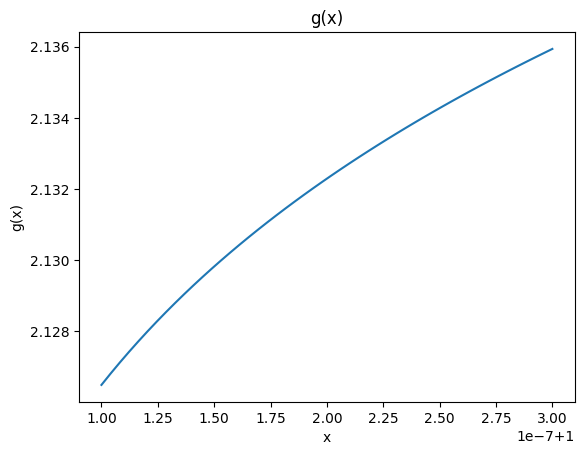

In [190]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

eps = 1e-7
t = [x for x in np.linspace(1+eps, 1+3*eps)]
y = [g(i) for i in t]

ax.plot(t, y)
ax.set(xlabel='x', ylabel='g(x)',
       title='g(x)')
       

In [191]:
print(f"alpha=1, g(1+)={g(1+eps).evalf()}")
print(f"f(2)={f(2)}")


alpha=1, g(1+)=2.12649227315745
f(2)=1/2


### Question 3


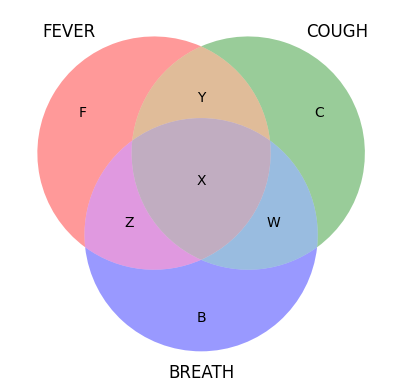

In [192]:
from matplotlib_venn import venn3, venn3_circles
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('FEVER', 'COUGH', 'BREATH'))
labels = {
    '100' : 'F',
    '010' : 'C',
    '001' : 'B',
    '110' : 'Y',
    '111' : 'X',
    '101' : 'Z',
    '011' : 'W',
}
for label_id, label in labels.items():
    v.get_label_by_id(label_id).set_text(label)
    

In [193]:
# Given in question
F = 190
C = 220
B = 220
X = 30

# Solve for Y,Z,W

from sympy.abc import y,z,w
from sympy.solvers import solve
# F+C-X-Y=330
Y = solve(F+C-X-y-330, y)[0]
# C+B-X-W=350
W = solve(C+B-X-w-350, w)[0]
# F+B-X-Z=340
Z= solve(F+B-X-z-340, z)[0]

print(f'Y: {Y}, Z: {Z}, W:{W}')
answer = (900-(X+Y+Z+W))/900
print(f'Q3: Answer: {answer}')


Y: 50, Z: 40, W:60
Q3: Answer: 4/5


### Question 4


In [194]:
x,y = symbols("x y", real=True)
z = x+I*y

numerator = (2+3*z+4*z*z)
denom = (2-3*z+4*z*z)


num_imag = numerator.as_real_imag()[1]
num_imag


8*x*y + 3*y

In [195]:
X=solve(8*x+3, x)[0]
print(f"x={X}")


x=-3/8


In [196]:
k = numerator / denom -  conjugate(numerator / denom)
solve(k.subs(x,X),  y)


[(0,), (-sqrt(23)/8,), (sqrt(23)/8,)]

In [197]:
y = sqrt(23)/8
answer = X**2 + y**2
print(f"Question 4: {answer}")


Question 4: 1/2


### Question 5


In [198]:
x,y = symbols("x y", real=True)
z = x+I*y
z_conj = conjugate(z)
solutions = solve(z_conj - z*z - I*(z_conj+z*z), x, y)
print(f"Solutions: {solutions}")
print(f"Number of solutions: {len(solutions)}")


Solutions: [(0, 0), (0, 1), (-sqrt(3)/2, -1/2), (sqrt(3)/2, -1/2)]
Number of solutions: 4


### Question 6


In [199]:
l,w, d1 = symbols("l, w, d1", real=True)
d2 = 10/d1
def area(i):
    return (l + (i-1)*d1) * (w+(i-1)*d2)

A_51 = area(51)
A_50 = area(50)
one_diff = simplify(A_51 - A_50)
required = simplify(area(100) - area(90))

one_diff


d1*w + 990 + 10*l/d1

In [200]:
required


10*d1*w + 18800 + 100*l/d1

In [201]:
simplify(area(100) - area(90))
diff_value = required - (one_diff*10)
diff_value


8900

In [202]:
answer = diff_value+1000*10
print(f"Question 6: {answer}")


Question 6: 18900


### Question 7


In [203]:
def check_digits(n):
    return all(c in '023467' for c in str(n))

count = sum(1 for x in range(2022, 4483) if check_digits(x))
print(f"Question 7: {count}")


Question 7: 569


### Question 8


In [204]:
C = Point(0,3)
B = Point(1, 0)
A = Point(0, 0)
triangle = Triangle(A,B,C)
centre = triangle.circumcenter
radius = triangle.circumradius

r = symbols('r', real=True)
# x,y = circumcenter, R= circumradius
# (r-x)^2 + (r-y)^2 = (R-r)^2
answer=solve(
    (centre[0]-r)**2 + (centre[1]-r)**2 - (radius-r)**2, r)

print(f"Question 8: {answer} ({answer[1].evalf()})")


Question 8: [0, 4 - sqrt(10)] (0.837722339831621)


### Question 9


In [205]:
a,x = symbols('a x', real=True)
log_x = log(x)
expression = sqrt(log_x) / (x*(a-(log_x**(3/2)))**2)

expression


sqrt(log(x))/(x*(a - log(x)**1.5)**2)

In [206]:
q=integrate(expression,(x,1,E))
q


0.666666666666667/(a - 1) - 0.666666666666667/a

In [207]:
x,y = symbols('x y', real=True)
b = 2/3 * ((y/(x-1)) - (y/x))

solution = solve(b-1, x)
print(f"Question 9 solution = {solution}, where y=1")


Question 9 solution = [0.5 - 0.816496580927726*sqrt(y + 0.375), 0.816496580927726*sqrt(y + 0.375) + 0.5], where y=1


In [208]:
### Question 10


In [209]:
from functools import cache

@cache
def a(n):
    return 7 + (n-1) * 8

@cache
def T(n):
    if n == 1: return 3
    # T(n) = a(n-1) + T(n-1)
    return T(n-1) + a(n-1)

print(f"T_20: {T(20)}")
print(f"T_30: {T(30)}")
print(f"Sum(T_1 .. T_20): {sum(T(x) for x in range(1, 21))}")
print(f"Sum(T_1 .. T_30): {sum(T(x) for x in range(1, 31))}")


T_20: 1504
T_30: 3454
Sum(T_1 .. T_20): 10510
Sum(T_1 .. T_30): 35615


### Question 12


In [210]:
a,b,g = symbols('a b g', real=True)
t, p = symbols('t p', real=True)
A = solve((a+10) / 2 + (t+p), a)[0]
B = solve((b+15)/2 -t, b)[0]
G = solve((g+20)/2 - (1+p), g)[0]
print(f"A: {A}, B: {B}, G: {G}")
print(f"3(a+b)={3*(A+B)}")
print(f"3(b+g)={3*(B+G)}")
print(f"3(g+a)={3*(G+A)}")
print(f"3(a+b+g)={3*(A+B+G)}")
print("Solutions for 3*(a+b):", solve(3*(A+B)+101, (p,t)))
print("Solutions for 3*(b+g):",solve(3*(B+G)+71, (p,t)))
print("Solutions for 3*(g+a):",solve(3*(G+A)+86, (p,t)))
print("Solutions for 3*(a+b+g):",solve(3*(A+B+G)+121, (p,t)))


A: -2*p - 2*t - 10, B: 2*t - 15, G: 2*p - 18
3(a+b)=-6*p - 75
3(b+g)=6*p + 6*t - 99
3(g+a)=-6*t - 84
3(a+b+g)=-129
Solutions for 3*(a+b): [(13/3, t)]
Solutions for 3*(b+g): [(14/3 - t, t)]
Solutions for 3*(g+a): [(p, 1/3)]
Solutions for 3*(a+b+g): []


### Question 13


In [211]:
# tangent
# y = mx + 1 / m
m, q = symbols('m q', real=True)
P = Point(-2, 1)
slopes = solve(P[1] - (m*P[0]) - (1/m), m)
print(f"slopes: {slopes}")
intersect_pts = []
for s in slopes:
    # y = mq + 1 /m
    yy = s*q + 1/s
    xx = solve(yy*yy-4*q, q)[0]
    yy = s*xx + 1/s
    intersect_pts.append(Point(xx,yy))
print(f"Intersection points: {intersect_pts}")
focus = Point(1, 0)
from sympy import Line
line1 = Line(intersect_pts[0], focus)
line2 = Line(intersect_pts[1], focus)
print(line1.equation())
print(line2.equation())

Q1 = line1.perpendicular_line(P).intersection(line1)[0]
Q2 = line2.perpendicular_line(P).intersection(line2)[0]
print(f'Q1={Q1}, Q2={Q2}')


slopes: [-1, 1/2]
Intersection points: [Point2D(1, -2), Point2D(4, 4)]
x - 1
4*x - 3*y - 4
Q1=Point2D(1, 1), Q2=Point2D(2/5, -4/5)


In [212]:
print(f"SQ={Q1.distance(focus)}")
print(f"Q1Q2={Q1.distance(Q2)}")
print(f"PQ1={Q1.distance(P)}")
print(f"SQ2={Q2.distance(focus)}")


SQ=1
Q1Q2=3*sqrt(10)/5
PQ1=3
SQ2=1


### Question 14


In [213]:
def f(theta):
    m1 = Matrix([
        [1, sin(theta), 1],
        [-sin(theta), 1, sin(theta)],
        [-1, -sin(theta), 1]
    ])
    
    m2 = Matrix([
        [sin(pi), cos(theta+pi/4), tan(theta - pi/4)],
        [sin(theta-pi/4), -cos(pi/2), log(4/pi)],
        [cot(theta+pi/4), log(pi/4), tan(pi)]
    ])
    return simplify(1/2 * m1.det() + m2.det())

t = symbols('t', real=True)

print(f"f(theta)={f(t)}")

def g(theta):
    return sqrt(f(theta)-1) + sqrt(f(pi/2 - theta) - 1)
print(f"g(theta)={g(t)}")


f(theta)=1.0*sin(t)**2 + 1.0
g(theta)=1.0*Abs(sin(t)) + 1.0*Abs(cos(t))


Min: 1.00000000000000, max: 1.41403190070121


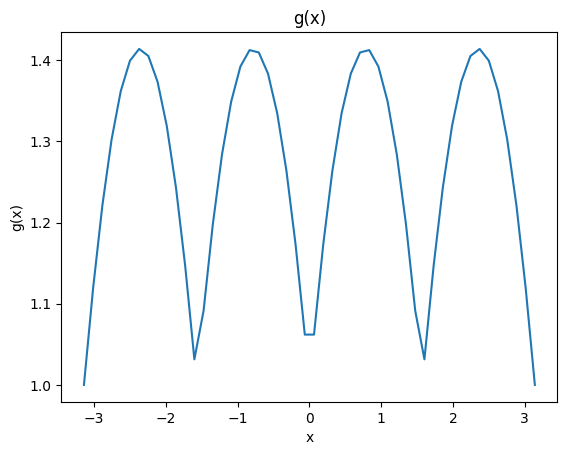

In [214]:
fig, ax = plt.subplots()

t = [x for x in np.linspace(-math.pi, math.pi)]
y = [abs(sin(i)) + abs(cos(i)) for i in t]

ax.plot(t, y)
ax.set(xlabel='x', ylabel='g(x)',
       title='g(x)')
print(f"Min: {min(y)}, max: {max(y)}")


In [215]:
def poly(x):
    return simplify((x-1) * (x-sqrt(2)))
for q in [2, (3+sqrt(2))/4, (1+3*sqrt(2))/4, 
        (5*sqrt(2) - 1)/4, (5-sqrt(2))/4]:
    v = poly(q)
    print(f"p({q}) = {v} ({v.evalf()})")
    

p(2) = 2 - sqrt(2) (0.585786437626905)
p(sqrt(2)/4 + 3/4) = -9/16 + 3*sqrt(2)/8 (-0.0321699141100894)
p(1/4 + 3*sqrt(2)/4) = -9/16 + 3*sqrt(2)/8 (-0.0321699141100894)
p(-1/4 + 5*sqrt(2)/4) = 15/16 - 5*sqrt(2)/8 (0.0536165235168156)
p(5/4 - sqrt(2)/4) = 15/16 - 5*sqrt(2)/8 (0.0536165235168156)


### Question 15


In [216]:
x = symbols('x', real=True)
f1 = cos(x) + sin(x) - 1
f2 = sqrt(3) * tan(3*x) - 1
f3 = 2* cos(2*x) - sqrt(3)
f4 = sin(x) - cos(x) - 1
for f in [f1, f2, f3, f4]:
    print(f"{f} = {solve(f, x)}")
    

sin(x) + cos(x) - 1 = [0, pi/2]
sqrt(3)*tan(3*x) - 1 = [pi/18]
2*cos(2*x) - sqrt(3) = [pi/12, 11*pi/12]
sin(x) - cos(x) - 1 = [pi/2]


### Question 16


In [217]:
from collections import Counter
from itertools import product 
counts = Counter()
for x in range(1, 7):
    for y in range(1, 7):
        if x > y:
            counts['x>y'] +=1
        elif x == y:
            counts['x=y'] += 1
        else:
            counts['x>y'] += 1
print(counts)
# P(x>y) = P(x>y) = 15/36 = 5/12
p_x_le_y = counts['x>y']/36
p_x_ge_y = counts['x>y']/36
p_x_eq_y = counts['x=y']/36


def score(outcome):
    if outcome == 'x=y': 
        return (2,2, p_x_eq_y)
    if outcome == 'x>y':
        return (0, 5, p_x_le_y)
    return (5,0, p_x_ge_y)
    

PX2_ge_Y2=0
for r1,r2 in product(counts, counts):
    round1 =score(r1)
    round2 = score(r2)
    if (round1[0] + round2[0]) >= (round1[1] + round2[1]):
        PX2_ge_Y2 += round1[-1] * round2[-1]
    
print(f"P(X2>=Y2) = {nsimplify(PX2_ge_Y2)}")

PX3_gr_Y2 = 0
for r in product(counts, counts, counts):
    rounds =[score(x) for x in r]
    if sum(x[0] for x in rounds) > (sum(x[1] for x in rounds)):
        PX3_gr_Y2 += rounds[0][-1] * rounds[1][-1] * rounds[2][-1]
print(f"P(X3>Y3) = {PX3_gr_Y2}, 355/864={355/864}, 77/432={77/432}")

        
        
        

Counter({'x>y': 30, 'x=y': 6})
P(X2>=Y2) = 1/36
P(X3>Y3) = 0, 355/864=0.41087962962962965, 77/432=0.17824074074074073


### Question 17


In [218]:
a,d = symbols('a d', real=True)
def h(n):
    return 1 / (a+(n-1)*d)

p = h(10)
q = h(100)
r = h(1000)

p, q, r


(1/(a + 9*d), 1/(a + 99*d), 1/(a + 999*d))

In [219]:
solve(q/r-10)


[{a: d}]

In [220]:
p1, q1, r1 = p.subs(a,d), q.subs(a,d), r.subs(a,d)
p1, q1, r1


(1/(10*d), 1/(100*d), 1/(1000*d))

In [221]:
x,y,z = symbols('x y z', real=True)

p1, q1, r1 = p.subs(a,d), q.subs(a,d), r.subs(a,d)
A = Matrix([[1, 1, 1], [10, 100, 1000], [q1*r1, p1*r1, p1*q1]])
b = Matrix([[1], [0], [0]])
linsolve((A,b), [x,y,z])


{(10*z + 10/9, -11*z - 1/9, z)}

In [222]:
A = Matrix([[1, 1, 1], [10, 100, 1000], [q*r, p*r, p*q]])
b = Matrix([[1], [0], [0]])
linsolve((A,b), [x,y,z])


EmptySet

### Question 18


In [223]:
# ellipse: x^2/4 + y^2/3 = 1
# auxillary circle: x^2 + y^2 = 4

alpha = symbols('alpha', real=True)
x, y = symbols('x, y', real=True)
# calculate intersection for ellipse and aux circle
ellipse = alpha**2/4 + y**2/3 - 1
aux_circle = alpha**2+y**2-4
circle_intersect = solve(aux_circle, y)
ellipse_intersect = solve(ellipse, y)
print(f"Ellipse intersect: {ellipse_intersect}")
print(f"Circle intersect: {circle_intersect}")


Ellipse intersect: [-sqrt(12 - 3*alpha**2)/2, sqrt(12 - 3*alpha**2)/2]
Circle intersect: [-sqrt(4 - alpha**2), sqrt(4 - alpha**2)]


In [224]:
E = Point(alpha, sqrt(12 - 3*alpha**2)/2)
F = Point(alpha, sqrt(4-alpha**2))
print(f"E={E}, F={F}")


E=Point2D(alpha, sqrt(12 - 3*alpha**2)/2), F=Point2D(alpha, sqrt(4 - alpha**2))


In [225]:
# tangent to ellipse at point x1,y1 = xx1/a^2 + yy1/b^2 - 1 = 0
# x = a^2/ x1
G = Point(4/E[0], 0)
print(f"G={G}")
origin = Point(0,0)
f_origin_line = Line(F, Point(0,0))
line2 = Line(origin, G)
line2.angle_between(f_origin_line)


G=Point2D(4/alpha, 0)


acos(-Abs(alpha)/2)

In [226]:
H = Point(alpha, 0)

triangle = Triangle(H, G, F)
triangle.area


(4 - alpha**2)**(3/2)/(2*alpha)

In [227]:
option_1=2* cos(pi/4)
triangle.area.subs(alpha, option_1)


1

In [228]:
option_2 = 2 * cos(pi/3)
triangle.area.subs(alpha, option_2)


3*sqrt(3)/2